In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Reshape,Dropout,Flatten,LeakyReLU
from IPython import display

In [ ]:
(x_train,_),_ = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype(np.float32)/255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
LATENT_DIM = 32
BATCH_SIZE = 64

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(3000)
dataset = dataset.batch(BATCH_SIZE,drop_remainder = True).prefetch(1)

In [ ]:
def generator():
  model = tf.keras.Sequential()
  model.add(Dense(64,input_shape=[LATENT_DIM]))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(28*28,activation="sigmoid"))
  model.add(Reshape([28,28]))
  return model

In [ ]:
def discriminator():
  model = tf.keras.Sequential()
  model.add(Flatten(input_shape = [28,28]))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(1,activation="sigmoid"))
  return model

In [ ]:
dis = discriminator()
gen = generator()
gan = tf.keras.Sequential([gen,dis])
dis.compile(loss="binary_crossentropy",optimizer="Adam")
dis.trainable = False
gan.compile(loss="binary_crossentropy",optimizer="Adam")

In [ ]:
def train(gan,dataset,num_epochs):
  gen,dis = gan.layers
  for epoch in range(num_epochs):
    print(epoch)
    for real_image_batch in dataset:
      latent = tf.random.normal([BATCH_SIZE,LATENT_DIM])
      fake_image_batch = gen(latent)
      x_concat = tf.concat([real_image_batch,fake_image_batch],axis=0)
      y_concat = tf.concat([tf.convert_to_tensor(np.ones(BATCH_SIZE)),tf.convert_to_tensor(np.zeros(BATCH_SIZE))],axis=0)
      #y_concat = tf.constant([[1.]] * BATCH_SIZE + [[0.]] * BATCH_SIZE)
      dis.trainable = True
      dis.train_on_batch(x_concat,y_concat)
      dis.trainable = False
      latent = tf.random.normal([BATCH_SIZE,LATENT_DIM])
      y = tf.convert_to_tensor(np.ones(BATCH_SIZE))
      #y = tf.constant([[1.]] * BATCH_SIZE)
      gan.train_on_batch(latent, y)

In [ ]:
train(gan,dataset,20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


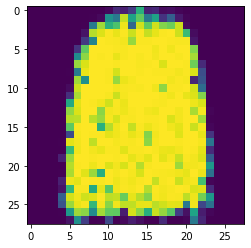

In [ ]:
latent = tf.random.normal([1,LATENT_DIM])
gen = gan.layers[0]
plt.imshow(gen(latent)[0,:,:])

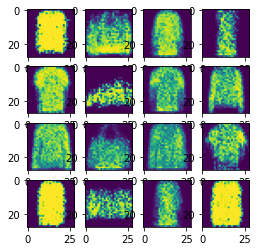

In [ ]:
def plot(images):
  #enter a square num of images
  num = np.sqrt(len(images))
  plt.figure(figsize=(num,num))
  for index, image in enumerate(images):
    plt.subplot(num,num,index+1)
    plt.imshow(image)

latent = tf.random.normal([16,LATENT_DIM])
gen = gan.layers[0]
plot(gen(latent))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
gan.save("/content/drive/MyDrive/CS419Project")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS419Project/assets
